In [8]:
import SimpleITK as sitk
import json
import numpy as np
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pydicom

In [9]:
CASE_PATH = r'C:\Users\ang.a\OneDrive - Technion\Documents\MRI_Data\clean cases\7'
ANNOTATION_DATA = r'C:\Users\ang.a\OneDrive - Technion\Documents\MRI_Data\clean cases\7\data\25.10.2021__00_01..annotation.json'

In [10]:
slice_locations = []
for i in glob(f'{CASE_PATH}\*.dcm'):
    f = Path(i)
    header = pydicom.dcmread(f)
    
    slice_locations.append(float(header['SliceLocation'].value))

slice_locations = dict(enumerate(sorted(slice_locations)))
slice_locations = dict([(value, key) for key, value in slice_locations.items()])

In [11]:
# open and read the annotation data
with open(ANNOTATION_DATA, 'r') as f: 
    annotation_points = json.load(f)
    data = annotation_points['MPR points']

data = np.array(data)
data[-1] 

array([-47.31481594, -38.65966669, 158.39999564])

In [12]:
# transform the DICOM folder to a numpy array
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(CASE_PATH)
reader.SetFileNames(dicom_names)
image = reader.Execute()
nda = sitk.GetArrayFromImage(image)

nda = np.flipud(nda)
# nda = np.reshape(nda, nda.shape, order='F')

In [13]:
# get the slice indices that have annotations...
indices = [slice_locations[z] for z in np.unique(data[:,2])]
print(indices)

indices = list(range(indices[0], indices[-1]+1))
print(indices)

[18, 19, 20, 21, 22, 23, 24]
[18, 19, 20, 21, 22, 23, 24]


In [14]:
# convert the last coordinate to the slice index
data_copy = np.copy(data)

for i in data_copy:
    i[2] = slice_locations[i[2]]

In [15]:
print(image.GetSpacing()[0]*image.GetWidth())
print(image.GetSpacing()[1]*image.GetHeight())
print(image.GetSpacing()[2]*image.GetDepth())


499.51220703124994
499.51220703124994
184.79999193638227


In [16]:
x_num = image.GetSize()[0]
# xi = image.TransformIndexToPhysicalPoint([0,0,0])[0]
# xf = image.TransformIndexToPhysicalPoint([x_num-1,x_num-1,0])[0]
xi = -1 * image.GetSpacing()[0]*image.GetWidth()/2
xf = 1 * image.GetSpacing()[0]*image.GetWidth()/2

y_num = image.GetSize()[1]
# yi = image.TransformIndexToPhysicalPoint([0,0,0])[1]
# yf = image.TransformIndexToPhysicalPoint([y_num-1,y_num-1,0])[1]
yi = -1 * image.GetSpacing()[1]*image.GetHeight()/2
yf = 1 * image.GetSpacing()[1]*image.GetHeight()/2

x_translate = ((np.abs(xi)+np.abs(xf))/2) - np.abs(image.GetOrigin()[0])
y_translate = ((np.abs(yi)+np.abs(yf))/2) - np.abs(image.GetOrigin()[1])

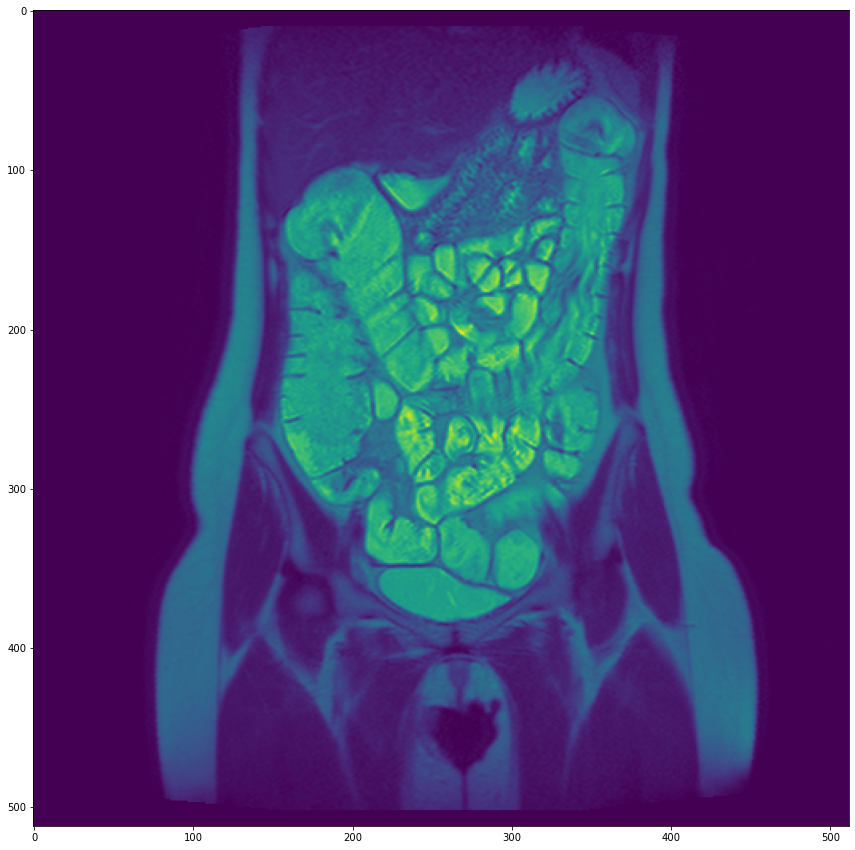

In [19]:
i = 19
pt = (data[0])

plt.figure(figsize=(15,15))
plt.imshow(nda[i,:,:])
# plt.imshow(nda[i,:,:], extent=[xi,xf,yi,yf])
plt.show()


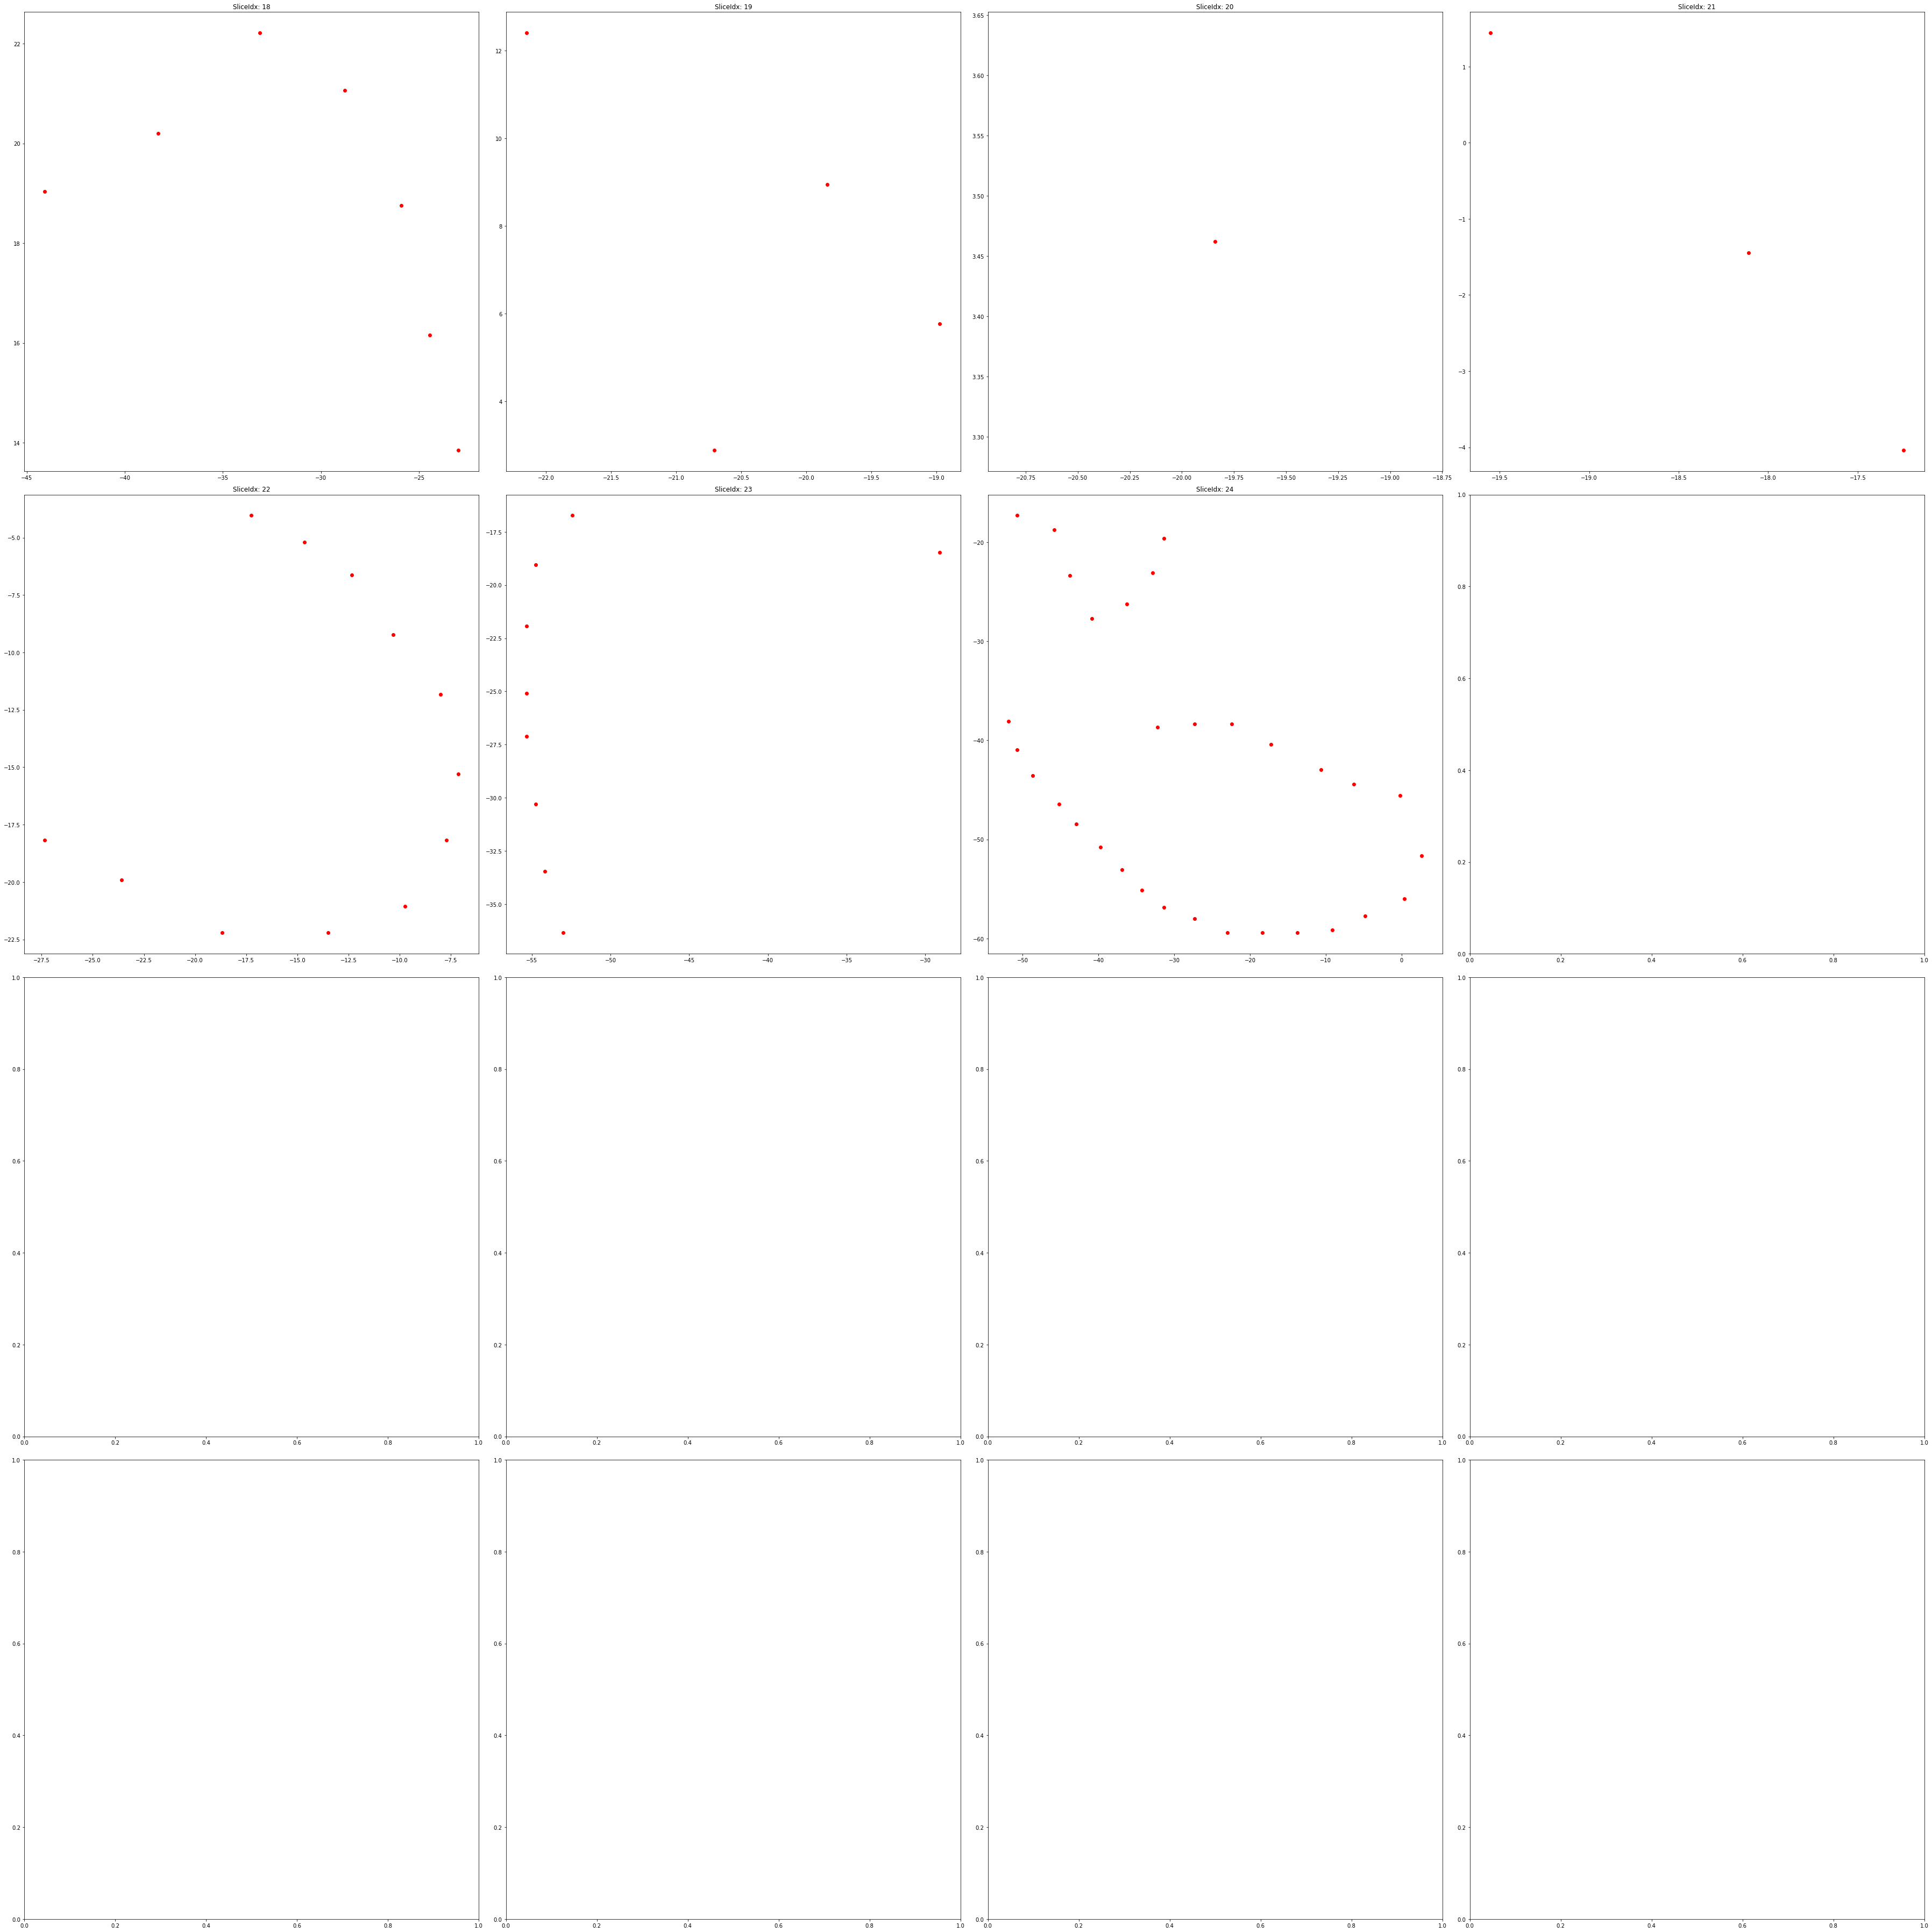

In [18]:
# show all slices
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(50,50))

axs = np.ravel(axs)

for idx, i in enumerate(indices):
    axs[idx].set_title(f'SliceIdx: {i}')
    # axs[idx].imshow(nda[i,:,:], extent=[xi,xf,yi,yf])

    for pt in data_copy:
        if pt[2] == i:
            axs[idx].plot(pt[0]+x_translate, pt[1], 'ro')
plt.tight_layout()
